<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Modelling-Outline" data-toc-modified-id="Modelling-Outline-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Modelling Outline</a></span></li><li><span><a href="#Mount-Google-Drive-to-Colab" data-toc-modified-id="Mount-Google-Drive-to-Colab-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Mount Google Drive to Colab</a></span></li><li><span><a href="#Install-modules-and-import-requirements" data-toc-modified-id="Install-modules-and-import-requirements-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Install modules and import requirements</a></span></li><li><span><a href="#Define-dictionaries-for-casting-DataFrame-datatypes" data-toc-modified-id="Define-dictionaries-for-casting-DataFrame-datatypes-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Define dictionaries for casting DataFrame datatypes</a></span></li><li><span><a href="#Define-custom-functions" data-toc-modified-id="Define-custom-functions-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Define custom functions</a></span></li><li><span><a href="#Import-input-data" data-toc-modified-id="Import-input-data-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Import input data</a></span></li><li><span><a href="#Clean-input-data" data-toc-modified-id="Clean-input-data-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Clean input data</a></span></li><li><span><a href="#Remove-highly-correlated-features" data-toc-modified-id="Remove-highly-correlated-features-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Remove highly correlated features</a></span></li><li><span><a href="#Split-data-to-training-and-test" data-toc-modified-id="Split-data-to-training-and-test-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Split data to training and test</a></span></li><li><span><a href="#Baseline-model:-Dummy-classifier" data-toc-modified-id="Baseline-model:-Dummy-classifier-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Baseline model: Dummy classifier</a></span></li><li><span><a href="#Univariate-model:-Logistic-Regression-with-times_ordered_from_aisle-feature" data-toc-modified-id="Univariate-model:-Logistic-Regression-with-times_ordered_from_aisle-feature-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Univariate model: Logistic Regression with <code>times_ordered_from_aisle</code> feature</a></span></li><li><span><a href="#Model-Evaluation:-Logistic-Regression" data-toc-modified-id="Model-Evaluation:-Logistic-Regression-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>Model Evaluation: Logistic Regression</a></span></li><li><span><a href="#Model-Evaluation:-Random-Forest-Classifier" data-toc-modified-id="Model-Evaluation:-Random-Forest-Classifier-13"><span class="toc-item-num">13&nbsp;&nbsp;</span>Model Evaluation: Random Forest Classifier</a></span></li><li><span><a href="#Model-Evaluation:-XGBoost-Classifier" data-toc-modified-id="Model-Evaluation:-XGBoost-Classifier-14"><span class="toc-item-num">14&nbsp;&nbsp;</span>Model Evaluation: XGBoost Classifier</a></span></li><li><span><a href="#Model-Selection" data-toc-modified-id="Model-Selection-15"><span class="toc-item-num">15&nbsp;&nbsp;</span>Model Selection</a></span></li><li><span><a href="#Hyperparameter-Tuning-using-Randomized-Search" data-toc-modified-id="Hyperparameter-Tuning-using-Randomized-Search-16"><span class="toc-item-num">16&nbsp;&nbsp;</span>Hyperparameter Tuning using Randomized Search</a></span></li><li><span><a href="#Feature-Selection-using-Random-Forest" data-toc-modified-id="Feature-Selection-using-Random-Forest-17"><span class="toc-item-num">17&nbsp;&nbsp;</span>Feature Selection using Random Forest</a></span></li><li><span><a href="#Final-Evaluation" data-toc-modified-id="Final-Evaluation-18"><span class="toc-item-num">18&nbsp;&nbsp;</span>Final Evaluation</a></span></li></ul></div>

# Modelling predictions of Instacart customer repurchases

Previously, the Instacart `training` set was merged with features created based on user's ordering history. We will now develop a classification model for predicting user repurchases.

## Modelling Outline

1. Remove indexes, redundant, and highly correlated features from `training` data
2. Determine baseline accuracy of classification model using a dummy classifier
3. Determine if accuracy of a univariate classification model improves on baseline accuracy
4. Evaluate other classification model algorithms trained on all features using classification metrics
5. Select best model and tune hyperparameters
6. Perform feature selection of best model after hyperparameter tuning
7. Perform final evaluation

## Mount Google Drive to Colab

Uncomment if running notebook in Google Colab

In [1]:
## Mount Google Drive to Colab VM 

#from google.colab import drive

#drive.mount('/content/drive', force_remount=True)

# change directory to Google Drive filepath for Instacart project notebook directory 

#%cd "/content/drive/My Drive/datsci/instacart/notebooks"

Enter your authorization code:
··········
Mounted at /content/drive
/content/drive/My Drive/datsci/instacart/notebooks


## Install modules and import requirements

In [0]:
# Import custom scripts
import sys
sys.path.append('../src')
from ml_metrics_pres import *

# Import data manipulation

import pandas as pd
import numpy as np

# Import data viz

import seaborn as sns
import matplotlib.pyplot as plt

# import ML

from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegressionCV 
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import make_scorer, accuracy_score, auc, roc_curve, roc_auc_score

In [0]:
# Define directory filepath for training data files

training_fp = '../data/training/'

## Define dictionaries for casting DataFrame datatypes

In [0]:
# Create datatype dictionary for pandas

train_dict = {'order_id': 'int32',
              'product_id': 'int32',
              'add_to_cart_order': 'int32',
              'reordered': 'int8',
              'user_id': 'int32',
              'order_number': 'int32',
              'order_dow': 'int8',
              'order_hour_of_day': 'int32',
              'days_since_prior_order': 'int32',
              'aisle_id': 'int32',
              'department_id': 'int32',
              'num_prior_orders_with_repurchase': 'int32',
              'total_products_ordered': 'int32',
              'total_products_reordered': 'int32',
              'mean_cart_size': 'float32',
              'mean_days_between_orders': 'float32',
              'most_freq_dow': 'int8',
              'mean_hour_order': 'float32',
              'days_since_last_order': 'int32',
              'n3_mean_cart_size': 'float32',
              'n3_mean_items_repurchased': 'float32',
              'n3_mean_prop_cart_repurchased': 'float32',
              'mean_organic_per_order': 'float32',
              'mean_choc_per_order': 'float32',
              'mean_gf_per_order': 'float32',
              'mean_produce_items': 'float32',
              'mean_dairy_items': 'float32',
              'times_ordered_from_aisle': 'int32'}

## Define custom functions

In [0]:
def get_dummy_scores(X, y, random_state, metric):
    
    scores_dict = {}
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=random_state)
    
    for strat in ['stratified', 'most_frequent', 'prior', 'uniform']:
        dummy = DummyClassifier(strategy=strat)
        dummy.fit(X_train, y_train)
        train_preds = dummy.predict(X_train)
        test_preds = dummy.predict(X_test)
        
        if metric == 'f1':
            train_score = f1_score(y_train, train_preds)
            test_score = f1_score(y_test, test_preds)
        else:
            train_score = dummy.score(X_train, y_train)
            test_score = dummy.score(X_test, y_test)
            
        scores = [train_score, test_score]
        scores_dict[strat] = scores
    
    return scores_dict

## Import input data

In [6]:
train_all = pd.read_csv(training_fp+'train_features.gz', compression='gzip', dtype=train_dict)

train_all.head()

,Unnamed: 0,order_id,product_id,add_to_cart_order,reordered,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,aisle_id,department_id,num_prior_orders_with_repurchase,total_products_ordered,total_products_reordered,mean_cart_size,mean_days_between_orders,most_freq_dow,mean_hour_order,days_since_last_order,n3_mean_cart_size,n3_mean_items_repurchased,n3_mean_prop_cart_repurchased,mean_organic_per_order,mean_choc_per_order,mean_gf_per_order,mean_produce_items,mean_dairy_items,times_ordered_from_aisle
0,0,1,49302,1,1,112108,4,4,10,9,120,16,2,21,9,7.0,11.0,1,15.0,15,7.0,3.0,0.475,3.0,1.0,0.0,1.5,3.0,2
1,1,1,11109,2,1,112108,4,4,10,9,108,16,2,21,9,7.0,11.0,1,15.0,15,7.0,3.0,0.475,3.0,1.0,0.0,1.5,3.0,2
2,2,1,10246,3,0,112108,4,4,10,9,83,4,2,21,9,7.0,11.0,1,15.0,15,7.0,3.0,0.475,3.0,1.0,0.0,1.5,3.0,2
3,3,1,49683,4,0,112108,4,4,10,9,83,4,2,21,9,7.0,11.0,1,15.0,15,7.0,3.0,0.475,3.0,1.0,0.0,1.5,3.0,2
4,4,1,43633,5,1,112108,4,4,10,9,95,15,2,21,9,7.0,11.0,1,15.0,15,7.0,3.0,0.475,3.0,1.0,0.0,1.5,3.0,5


In [7]:
train_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1384617 entries, 0 to 1384616
Data columns (total 29 columns):
Unnamed: 0                          1384617 non-null int64
order_id                            1384617 non-null int32
product_id                          1384617 non-null int32
add_to_cart_order                   1384617 non-null int32
reordered                           1384617 non-null int8
user_id                             1384617 non-null int32
order_number                        1384617 non-null int32
order_dow                           1384617 non-null int8
order_hour_of_day                   1384617 non-null int32
days_since_prior_order              1384617 non-null int32
aisle_id                            1384617 non-null int32
department_id                       1384617 non-null int32
num_prior_orders_with_repurchase    1384617 non-null int32
total_products_ordered              1384617 non-null int32
total_products_reordered            1384617 non-null int32
mean

## Clean input data

In [8]:
# Drop index columns

drop_col = ['department_id', 'aisle_id', 
            'order_id', 'product_id', 'user_id', 'Unnamed: 0']

train_final = train_all.drop(drop_col, axis=1)

train_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1384617 entries, 0 to 1384616
Data columns (total 23 columns):
add_to_cart_order                   1384617 non-null int32
reordered                           1384617 non-null int8
order_number                        1384617 non-null int32
order_dow                           1384617 non-null int8
order_hour_of_day                   1384617 non-null int32
days_since_prior_order              1384617 non-null int32
num_prior_orders_with_repurchase    1384617 non-null int32
total_products_ordered              1384617 non-null int32
total_products_reordered            1384617 non-null int32
mean_cart_size                      1384617 non-null float32
mean_days_between_orders            1384617 non-null float32
most_freq_dow                       1384617 non-null int8
mean_hour_order                     1384617 non-null float32
days_since_last_order               1384617 non-null int32
n3_mean_cart_size                   1384617 non-null float

## Remove highly correlated features

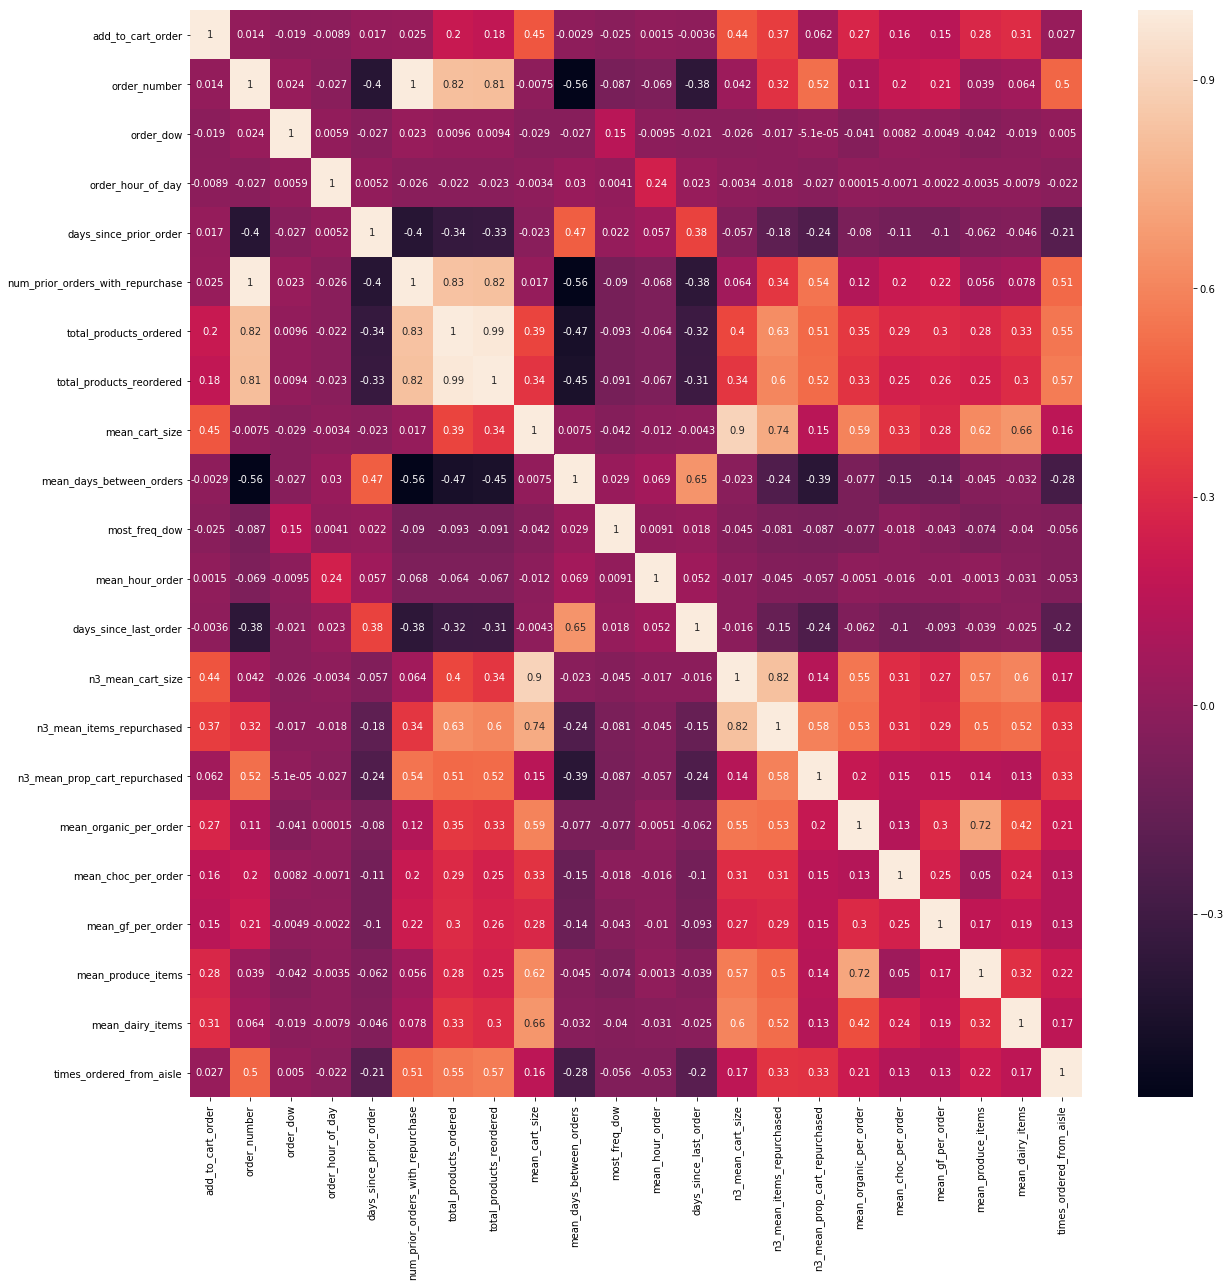

In [9]:
# View feature correlation

plt.figure(figsize=(20, 20))
sns.heatmap(train_final.drop('reordered', axis=1).corr(), annot=True)
plt.show()

Of the features in `training`, the following have a Pearson correlation of more than 0.75:

- `mean_cart_size` with `n3_mean_cart_size`
- `n3_mean_cart_size` with `n3_mean_items_repurchased`
- `order_number`, `total_products_ordered`, `total_products_reordered` and `num_prior_orders_with_repurchase`

We should also drop `n3_mean_items_repurchased` as it conveys the same information as `n3_mean_prop_cart_repurchased`.

From this analysis, the following features will be dropped from the training data: 

- `mean_cart_size`
-  `n3_mean_items_repurchased`
-  `order_number`
- `total_products_ordered`
- `total_products_reordered`

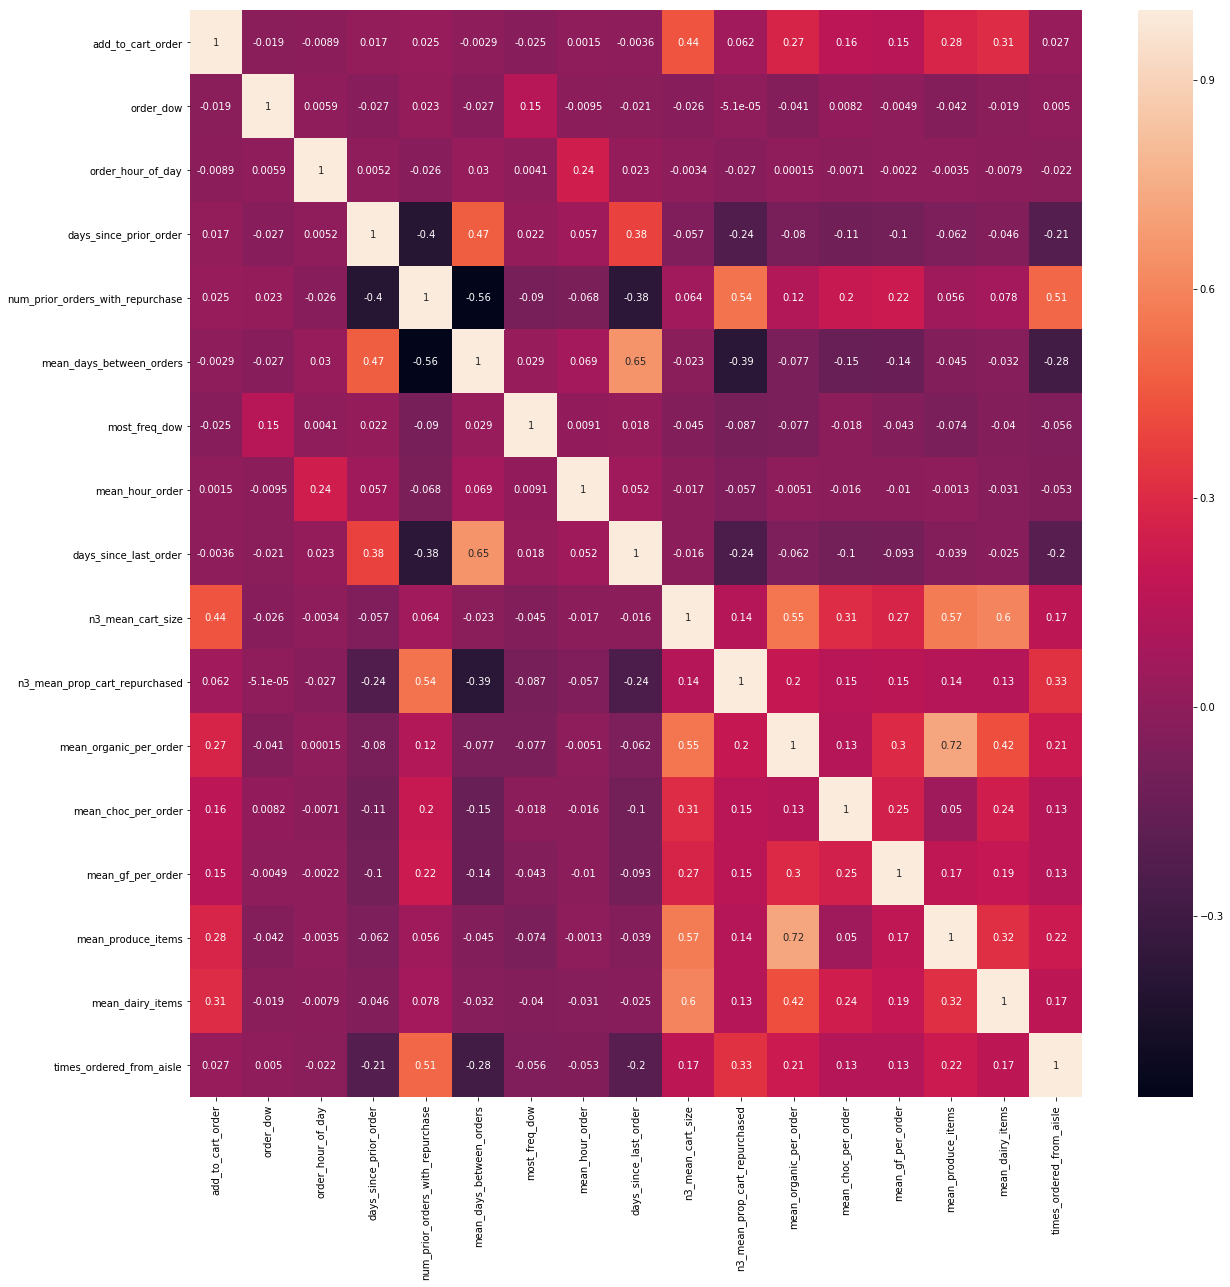

In [10]:
# Drop correlated features

drop_features = ['mean_cart_size', 'n3_mean_items_repurchased', 'total_products_ordered', 
                 'total_products_reordered', 'order_number']

# View feature correlation

plt.figure(figsize=(20, 20))
sns.heatmap(train_final.drop(drop_features + ['reordered'], axis=1).corr(), annot=True)
plt.show()

## Split data to training and test

In [0]:
# Define features and predictor

X = train_final.drop(['reordered'] + drop_features, axis=1)
X1 = np.array(train_final['times_ordered_from_aisle']).reshape(-1, 1)
y = train_final['reordered']

In [0]:
# Standardize features

scaler = StandardScaler()

X_std = scaler.fit_transform(X)
X1_std = scaler.fit_transform(X1)

In [0]:
# Split data

X_train, X_test, y_train, y_test = train_test_split(X_std, y, stratify=y, random_state=21)
X1_train, X1_test, _, _ = train_test_split(X1_std, y, stratify=y, random_state=21)

In [14]:
# Show shape of split data

print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)
print("\n")
print("y_train: ", y_train.shape)
print("y_test: ", y_test.shape)

X_train:  (1038462, 17)
X_test:  (346155, 17)


y_train:  (1038462,)
y_test:  (346155,)


## Baseline model: Dummy classifier

In [15]:
# Get accuracy for dummy classifier 

pd.DataFrame.from_dict(get_dummy_scores(X1, y, 122, 'accuracy'), orient='index')\
    .rename(columns={0: 'train_accuracy',
                     1: 'test_accuracy'})\
    .round(2)

,train_accuracy,test_accuracy
stratified,0.52,0.52
most_frequent,0.60,0.60
prior,0.60,0.60
uniform,0.50,0.50


Test accuracy of the dummy classifier is between 50-60% depending on baseline selection strategy. Always predicting the **most frequent** class will have an accuracy of 60%, so any subsequent classification model must better this score.   

## Univariate model: Logistic Regression with `times_ordered_from_aisle` feature

In [16]:
# Instantiate logreg

logreg_cv = LogisticRegressionCV(solver='lbfgs', class_weight='balanced', cv=5, random_state=12)

# Train

logreg_cv.fit(X1_train, y_train)

# Make predictions

uni_logreg_preds = logreg_cv.predict(X1_test)
uni_logreg_proba = logreg_cv.predict_proba(X1_test)

# Save evaluation metrics

uni_logreg_metrics = classification_metrics(y_test, uni_logreg_preds).rename(index={0:'Logistic Regresion (Univariate)'})

uni_logreg_metrics

,Accuracy,Precision,Recall,AUC
Logistic Regresion (Univariate),0.621932,0.821854,0.470363,0.659161


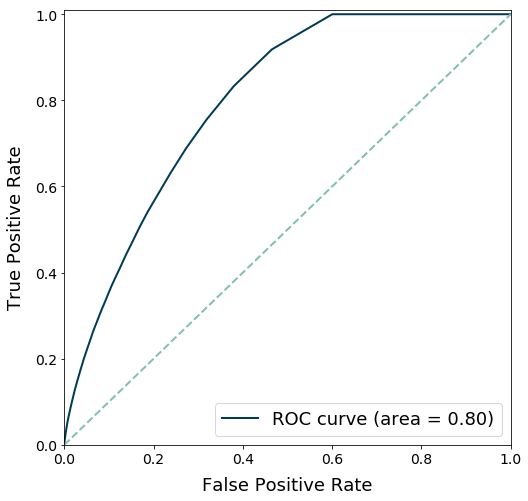

In [17]:
# Plot ROC curve

plot_roc_curve_pres(y_test, uni_logreg_proba[:, 1])

Accuracy of the univariate logistic regression model is a 2% improvement on accuracy over the dummy classifier. This indicates that multivariate models using logistic regression and more complex algorithms is worth pursuing.  

## Model Evaluation: Logistic Regression

In [18]:
%%time

# Fit logreg_cv with all features

logreg_cv.fit(X_train, y_train)

# Print training and test accuracy

print("Train accuracy (10-fold CV): ", cross_val_score(logreg_cv, X_test, y_test, cv=10).mean())
print("Test accuracy: ", logreg_cv.score(X_test, y_test))

Train accuracy (10-fold CV):  0.6977134572941639
Test accuracy:  0.6976210079299736
CPU times: user 5min 5s, sys: 2min 11s, total: 7min 16s
Wall time: 3min 42s


In [0]:
# Make predictions

logreg_preds = logreg_cv.predict(X_test)
logreg_proba = logreg_cv.predict_proba(X_test)

# Save evaluation metrics

logreg_metrics = classification_metrics(y_test, logreg_preds).rename(index={0:'Logistic Regresion'})

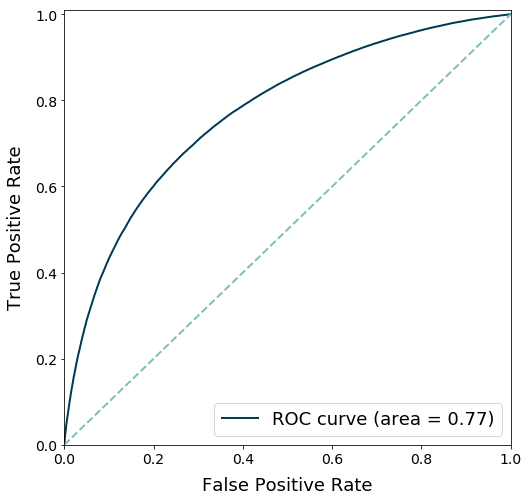

In [20]:
# Plot ROC curve

plot_roc_curve_pres(y_test, logreg_proba[:, 1])

## Model Evaluation: Random Forest Classifier

In [21]:
%%time

# Instantiate model

rf = RandomForestClassifier(n_estimators=100, class_weight='balanced', n_jobs=-1, oob_score=True, random_state=12)

# Train model

rf.fit(X_train, y_train)

CPU times: user 10min 16s, sys: 2.14 s, total: 10min 18s
Wall time: 5min 23s


In [22]:
print("Training accuracy: ", rf.score(X_train, y_train))
print("OOB score: ", rf.oob_score_)
print("Test accuracy: ", rf.score(X_test, y_test))

Training accuracy:  0.9999874814870453
OOB score:  0.7947214245682558
Test accuracy:  0.796172234981439


In [0]:
# Make predictions

rf_preds = rf.predict(X_test)
rf_proba = rf.predict_proba(X_test)

# Save metrics

rf_metrics = classification_metrics(y_test, rf_preds).rename(index={0:'Random Forest'})

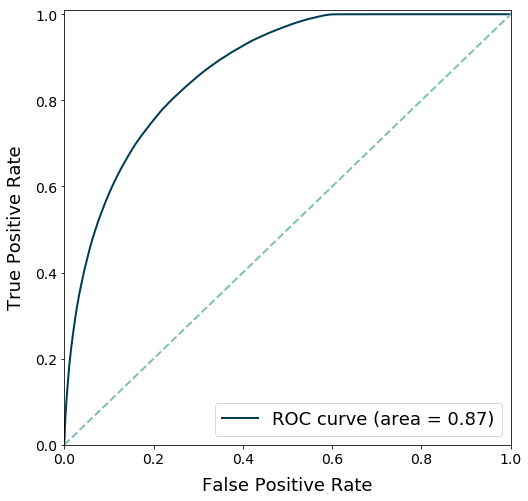

In [24]:
# Plot ROC curve

plot_roc_curve_pres(y_test, rf_proba[:, 1])

## Model Evaluation: XGBoost Classifier

In [25]:
%%time

# Calculate weights
weights = len(y[y==0]) / len(y[y==1])

# Instantiate

xg_clf = xgb.XGBClassifier(objective='binary:logistic', n_estimators=100, seed=123, scale_pos_weight=weights, random_state=12)

# Fit

xg_clf.fit(X_train, y_train)

CPU times: user 1min 26s, sys: 483 ms, total: 1min 27s
Wall time: 1min 27s


In [26]:
# Make predictions

xg_preds_train = xg_clf.predict(X_train)
xg_preds = xg_clf.predict(X_test)
xg_proba = xg_clf.predict_proba(X_test)

print("Training accuracy: ",  float(np.sum(xg_preds_train==y_train))/y_train.shape[0])
print("Test accuracy (all features): ",  float(np.sum(xg_preds==y_test))/y_test.shape[0])

Training accuracy:  0.7735410636113791
Test accuracy (all features):  0.7736129768456327


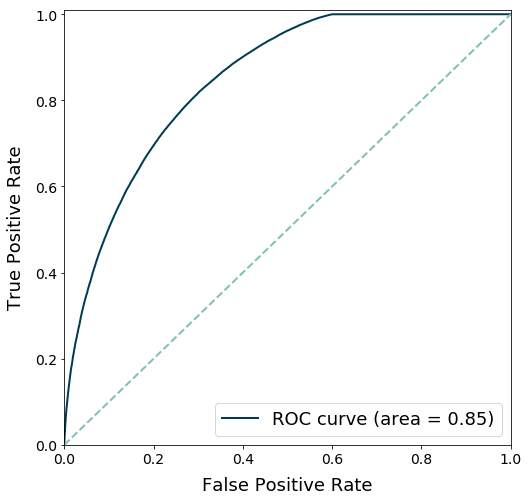

In [27]:
# Save classification metrics

xgb_metrics = classification_metrics(y_test, xg_preds).rename(index={0:'XGBoost Classifier'})

# Plot ROC curve

plot_roc_curve_pres(y_test, xg_proba[:, 1])

## Model Selection

In [28]:
# Concatenate classification metrics to create dataframe

metrics_df = pd.concat([logreg_metrics, rf_metrics, xgb_metrics],
                       axis=0).round(2)

metrics_df

,Accuracy,Precision,Recall,AUC
Logistic Regresion,0.70,0.79,0.67,0.70
Random Forest,0.80,0.80,0.88,0.77
XGBoost Classifier,0.77,0.79,0.84,0.76


The Random Forest classifier trained on all features provides the best test accuracy score of 80%. We will tune the hyperparameters of this model by random search and check if this results in an improvement in accuracy.  

## Hyperparameter Tuning using Randomized Search

In [0]:
# Define parameters for Randomised Search

param_grid = {'n_estimators': [100, 200],
              'max_depth': [30, 50, None],
              'min_samples_leaf': [10, 15],
              'max_features': [4, 10, 15]}

In [0]:
# Instantiate Randomized search CV

rf2 = RandomForestClassifier(class_weight='balanced', oob_score=True, random_state=12)
rs_cv = RandomizedSearchCV(rf2, param_grid, n_iter=5, cv=5, verbose=1, n_jobs=-1, random_state=12)

In [0]:
# Start random search

rs_cv.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed: 141.3min finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators='warn', n_jobs=None, oob_score=True,
            random_state=12, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=5, n_jobs=-1,
          param_distributions={'n_estimators': [100, 200], 'max_depth': [30, 50, None], 'min_samples_leaf': [10, 15], 'max_features': [4, 10, 15]},
          pre_dispatch='2*n_jobs', random_state=12, refit=True,
          return_train_score='warn', scoring=None, verbose=1)

In [0]:
rs_cv.best_params_

{'n_estimators': 200,
 'min_samples_leaf': 10,
 'max_features': 4,
 'max_depth': None}

In [0]:
# Save best estimator

clf = RandomForestClassifier(class_weight='balanced', 
                             max_depth=None,
                             max_features=4,
                             min_samples_leaf=10,
                             n_estimators=200,
                             n_jobs=-1,
                             oob_score=True,
                             random_state=12)

In [30]:
%%time

# Train best estimator

clf.fit(X_train, y_train)

CPU times: user 17min 49s, sys: 1.96 s, total: 17min 51s
Wall time: 9min 19s


RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features=4,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=10,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=200, n_jobs=-1, oob_score=True,
                       random_state=12, verbose=0, warm_start=False)

In [31]:
%%time
# Make predictions

tuned_preds = clf.predict(X_test)
tuned_proba = clf.predict_proba(X_test)

# Calculate metrics

tuned_metrics = classification_metrics(y_test, tuned_preds).rename(index={0:'Tuned Random Forest'})

CPU times: user 51.2 s, sys: 108 ms, total: 51.3 s
Wall time: 26.3 s


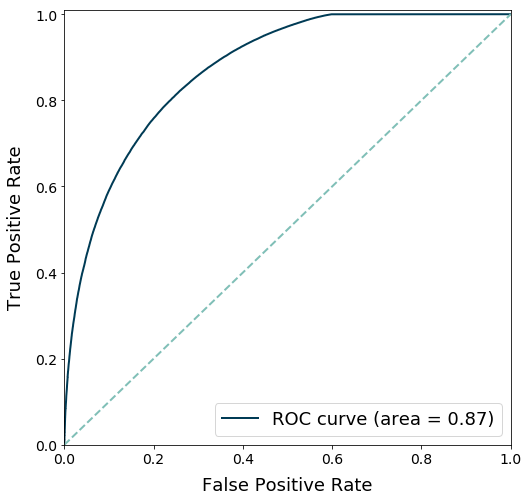

In [32]:
# Plot ROC curve

plot_roc_curve_pres(y_test, tuned_proba[:, 1])

In [33]:
# Compare classification metrics with default RF model

pd.concat([rf_metrics, tuned_metrics], axis=0)\
    .round(2)

,Accuracy,Precision,Recall,AUC
Random Forest,0.8,0.80,0.88,0.77
Tuned Random Forest,0.8,0.81,0.87,0.78


The tuned Random Forest model has the same accuracy and recall has the Random Forest model with default hyperparameters. However, it takes longer to train the tuned model largely due to the two-fold increase in the number of estimators. Therefore, we will perform feature selection using default hyperparameters instead. 

## Feature Selection using Random Forest

In [35]:
# View feature importances

feat_imp_df = pd.DataFrame({'Feature': X.columns,
                            'Feature Importance': rf.feature_importances_})\
                  .sort_values('Feature Importance', ascending=False)
    
feat_imp_df   

,Feature,Feature Importance
16,times_ordered_from_aisle,0.299278
0,add_to_cart_order,0.142690
10,n3_mean_prop_cart_repurchased,0.091237
5,mean_days_between_orders,0.046863
9,n3_mean_cart_size,0.045181
4,num_prior_orders_with_repurchase,0.044964
7,mean_hour_order,0.042863
14,mean_produce_items,0.040782
11,mean_organic_per_order,0.040540
15,mean_dairy_items,0.038155


In [0]:
# Add descriptive labels to feature importance dataframe

y_labels = ['Times previously ordered from item\'s aisle', 
            'Order item added to cart', 
            'Mean % repurchased items in last 3 orders', 
            'Mean days between orders',
            'Mean cart size for last 3 orders',
            'Total orders with repurchased item',
            'Mean hour of order',
            'Mean produce items per order',
            'Mean organic items per order',
            'Mean dairy items',
            'Days since last order',
            'Hour of order',
            'Days since order before last',
            'Weekday of order',
            'Mean chocolate items per order',
            'Most frequent weekday of order',
            'Mean gluten-free items per order']

feat_imp_df['Feature Name'] = pd.Series(y_labels, index=feat_imp_df.index)

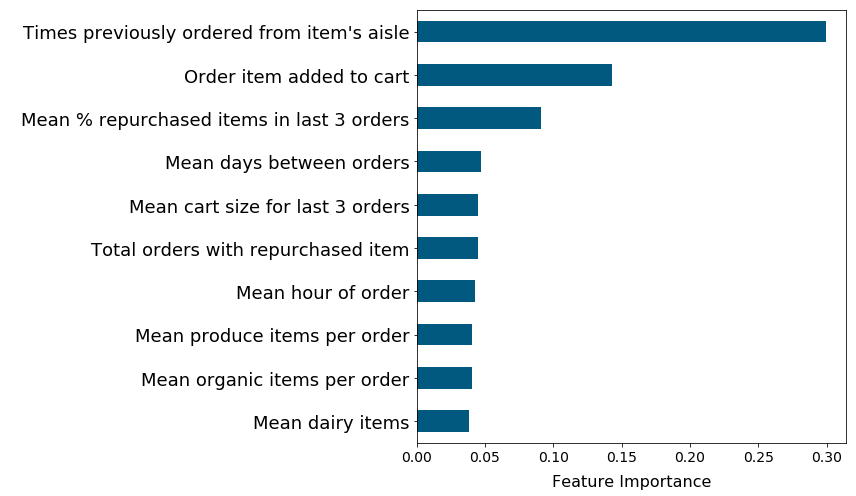

In [54]:
# Plot feature importances

top10_features = feat_imp_df.set_index('Feature Name').sort_values('Feature Importance', ascending=False).head(10)

fig, ax = plt.subplots(figsize=(12, 7))
top10_features.sort_values('Feature Importance').plot.barh(legend=False, ax=ax, color='#01597f')
ax.set_ylabel(" ")
ax.set_xlabel("Feature Importance", fontsize=16, labelpad=10)
ax.set_yticklabels(top10_features.sort_values('Feature Importance').index[:10], fontsize=18)
ax.tick_params(axis = 'x', which = 'major', labelsize = 14)

plt.tight_layout()
plt.savefig("../image/RF_feat_imp_all_final.jpg")
plt.show()

In [38]:
# Create selector that will use classifier with features that have an importance of more than 0.04

sfm = SelectFromModel(rf, threshold=0.04)

# Train selector

sfm.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True,
                                                 class_weight='balanced',
                                                 criterion='gini',
                                                 max_depth=None,
                                                 max_features='auto',
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100, n_jobs=-1,
                                                 oob_score=True,
                                                 random_state=12, verbose=0,
 

In [39]:
# Print the names of the most important features

for feature_index in sfm.get_support(indices=True):
    print(X.columns[feature_index])

add_to_cart_order
num_prior_orders_with_repurchase
mean_days_between_orders
mean_hour_order
n3_mean_cart_size
n3_mean_prop_cart_repurchased
mean_organic_per_order
mean_produce_items
times_ordered_from_aisle


In [0]:
# Transform the data to create a new dataset containing only the most important features

Ximp_train = sfm.transform(X_train)
Ximp_test = sfm.transform(X_test)

In [0]:
# Make new classifier to fit important features

rf_final = RandomForestClassifier(class_weight='balanced', 
                                  n_estimators=100,
                                  n_jobs=-1,
                                  oob_score=True,
                                  random_state=12)

In [45]:
%%time
# Fit classifier with more important features

rf_final.fit(Ximp_train, y_train)

CPU times: user 8min 40s, sys: 2.59 s, total: 8min 43s
Wall time: 4min 36s


RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=True,
                       random_state=12, verbose=0, warm_start=False)

In [0]:
# Make predictions

feat_imp_preds = rf_final.predict(Ximp_test)
feat_imp_proba = rf_final.predict_proba(Ximp_test)

## Final Evaluation

In [42]:
# Score latest classifier model

feat_imp_metrics = classification_metrics(y_test, feat_imp_preds)\
                       .rename(index={0: 'Random Forest with Feat. Selection'})
    
# Compare against previous models

pd.concat([rf_metrics, tuned_metrics, feat_imp_metrics], axis=0)\
    .round(2)

,Accuracy,Precision,Recall,AUC
Random Forest,0.80,0.80,0.88,0.77
Tuned Random Forest,0.80,0.81,0.87,0.78
Random Forest with Feat. Selection,0.79,0.79,0.89,0.77


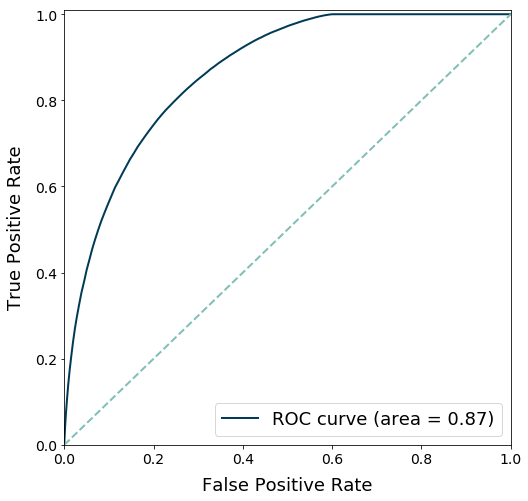

In [43]:
plot_roc_curve_pres(y_test, feat_imp_proba[:, 1])

The accuracy of a Random Forest model using 100 trees and otherwise default hyperparameters decreased by only 1% when the model is trained on only the top 9 features rather than all 17 features. This model should be favored over the Random Forest model trained on all features as the decrease in model complexity has not had a significant effect on the model's accuracy.